In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdYlBu")

In [49]:
data = data = pd.read_csv(r"C:\Users\Asus\Downloads\project\ML\Student Marks Prediction\Student_Performance.csv")

In [50]:
data.head(10)

,Student Id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,7,99,Yes,9,1,91
1,2,4,82,No,4,2,65
2,3,8,51,Yes,7,2,45
3,4,5,52,Yes,5,2,36
4,5,7,75,No,8,5,66
5,6,3,78,No,9,6,61
6,7,7,73,Yes,5,6,63
7,8,8,45,Yes,4,6,42
8,9,5,77,No,8,2,61
9,10,4,89,No,4,0,69


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Student Id                        10000 non-null  int64 
 1   Hours Studied                     10000 non-null  int64 
 2   Previous Scores                   10000 non-null  int64 
 3   Extracurricular Activities        10000 non-null  object
 4   Sleep Hours                       10000 non-null  int64 
 5   Sample Question Papers Practiced  10000 non-null  int64 
 6   Performance Index                 10000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 547.0+ KB


In [52]:
# see number of missing value in each column

data.isna().sum() 

Student Id                          0
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [53]:
if data.duplicated().sum()>0:
    print("duplicates exists")
else:
    print("duplicates does not exist")

duplicates does not exist


In [54]:
# see dimensions

data.shape

(10000, 7)

In [55]:
# see quick info of numeric values

data.describe()

,Student Id,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4.992900,69.445700,6.530600,4.583300,55.224800
std,2886.89568,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.00000,1.000000,40.000000,4.000000,0.000000,10.000000
25%,2500.75000,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5000.50000,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7500.25000,7.000000,85.000000,8.000000,7.000000,71.000000
max,10000.00000,9.000000,99.000000,9.000000,9.000000,100.000000


In [56]:
# see quick info of category values 

data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


**We Can see :**
   - Dataset no missing values
   - Dataset has no complete duplicates
     

### Discovering `Hours Studied` column

In [57]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [58]:
# see uniqie values

data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

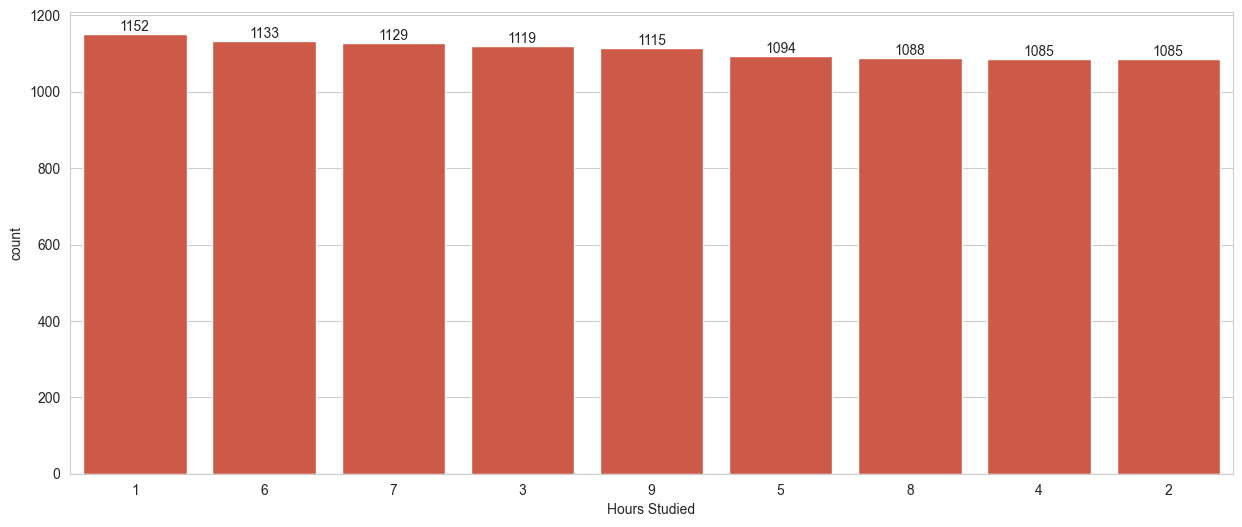

In [59]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Hours Studied") 

**We can see :**
   - Most student studied "1" hour
   - Other students studied Similar numbers of hours

### Discovering `Previous Scores` column

In [60]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

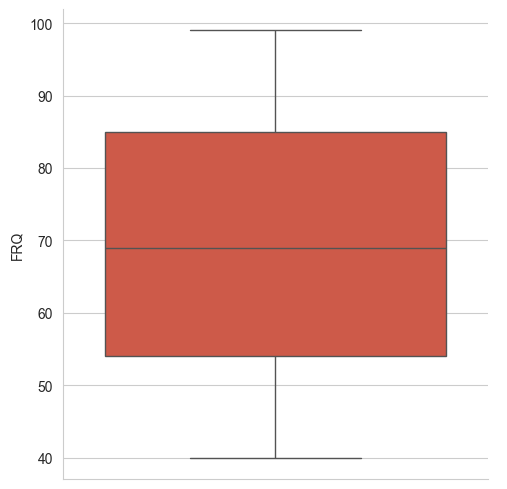

In [61]:
# see distribution 

box_plot(y_axis = "Previous Scores") # call function i create it in cell 11

**We can see :**
   - 50 % of students scored above 65
   - No student obtained the final grade

### Discovering `Extracurricular Activities` column

In [62]:
# see unique values

data["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

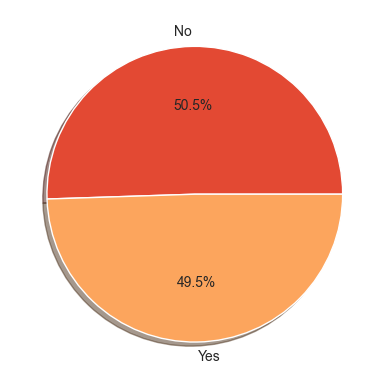

In [63]:
# output number of values count

plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()

**We can see :**
   - Most student "don't" participate in extracurricular activities

### Discovering `Sleep Hours` column

In [64]:
# see unique values

data["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

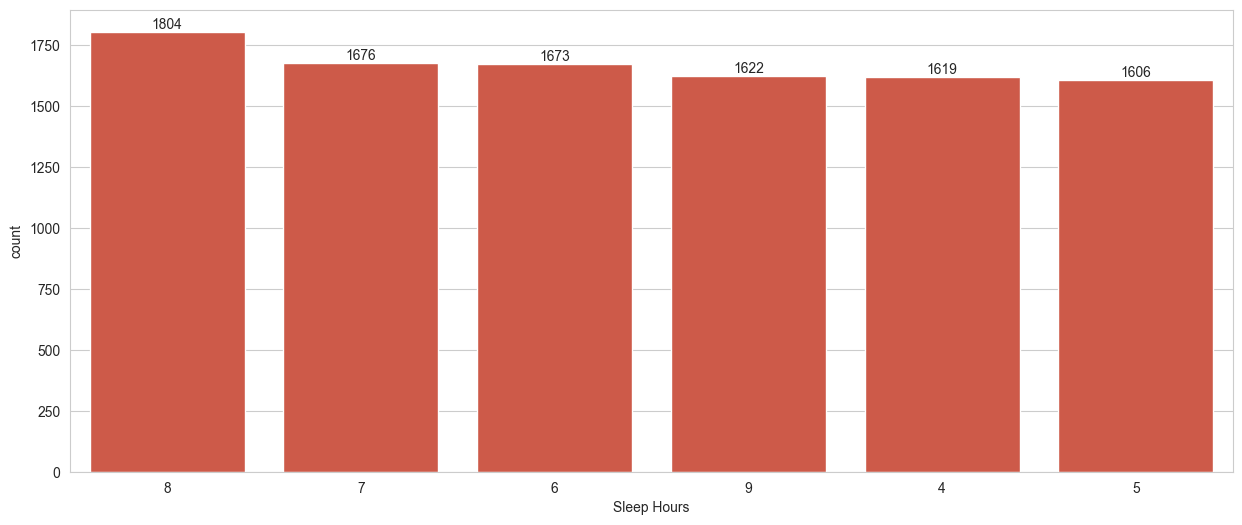

In [65]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sleep Hours")

**We can see :**
   - Most student Sleep 8 hours
   - Other students sleep Similar numbers of hours


### Discovering `Sample Question Papers Practiced` column

In [66]:
# see unique values

data["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

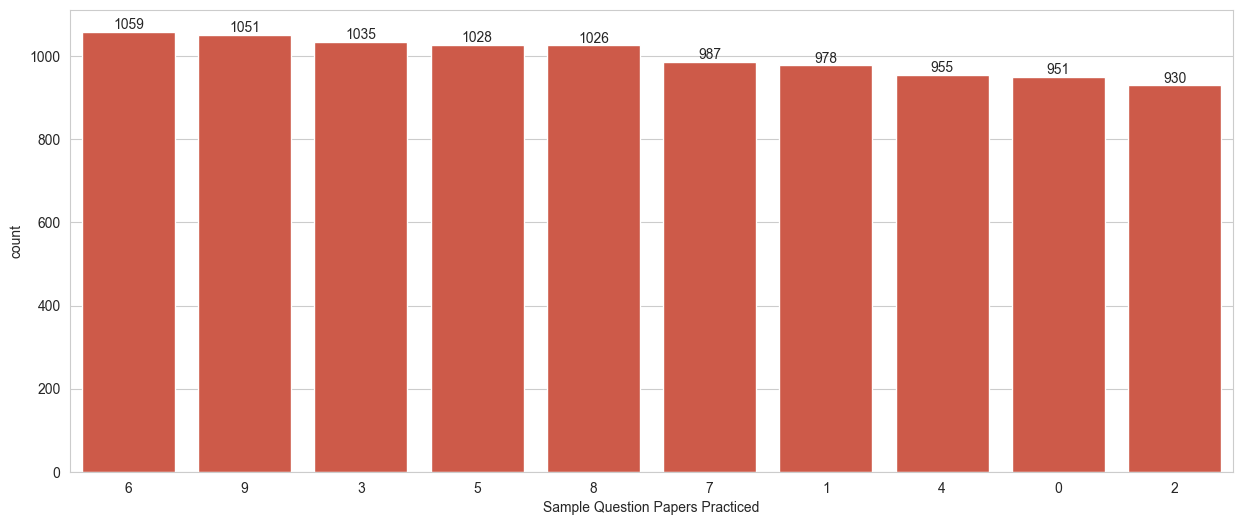

In [67]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sample Question Papers Practiced")

**We can see :**
   - All student have Similar The number of sample question papers the practiced.
   - **There are students who did not practice any questions**

## Bivariate Analysis & Visualizations

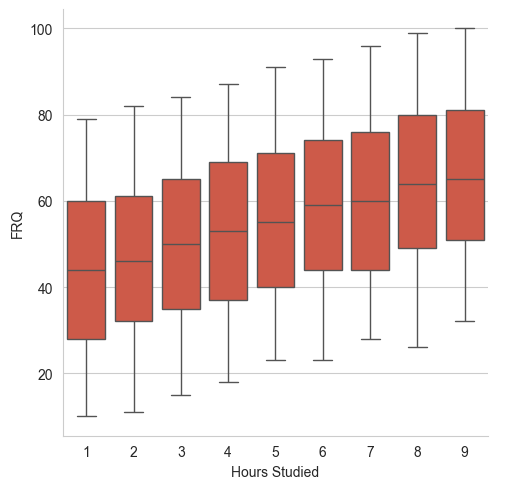

In [68]:
# What is "Hours Studied" and "Performance Index" distribution

box_plot(x_axis = "Hours Studied", y_axis = "Performance Index") # call function i create it in cell 11

  - As we can see, the more hours you study, the greater the success rate

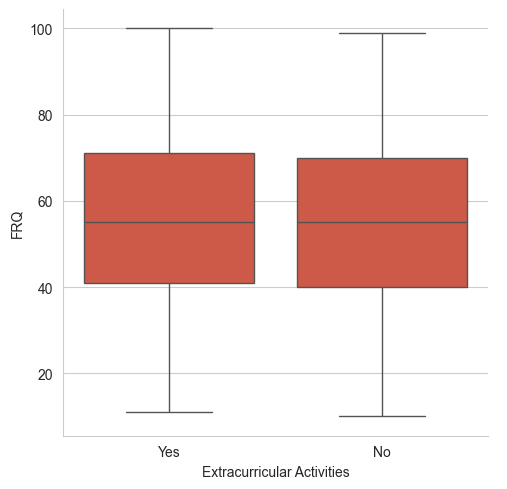

In [69]:
# What is "	Extracurricular Activities" and "Performance Index" distribution

box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index") # call function i create it in cell 11

 - Participation in extracurricular activities helps to a very small extent in obtaining high grades

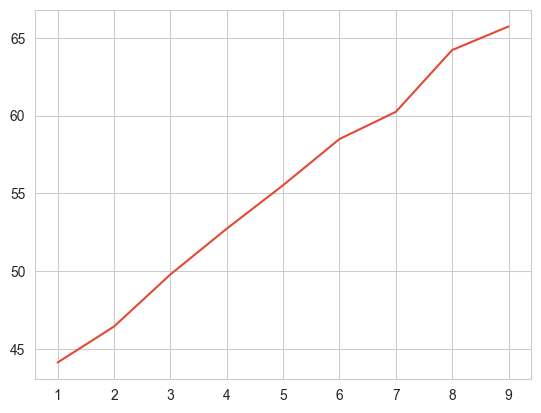

In [70]:
# What is "Extracurricular Activities" and "Performance Index" distribution

avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

- The more hours you sleep, Performance index increase

### Heatmap of Correlation

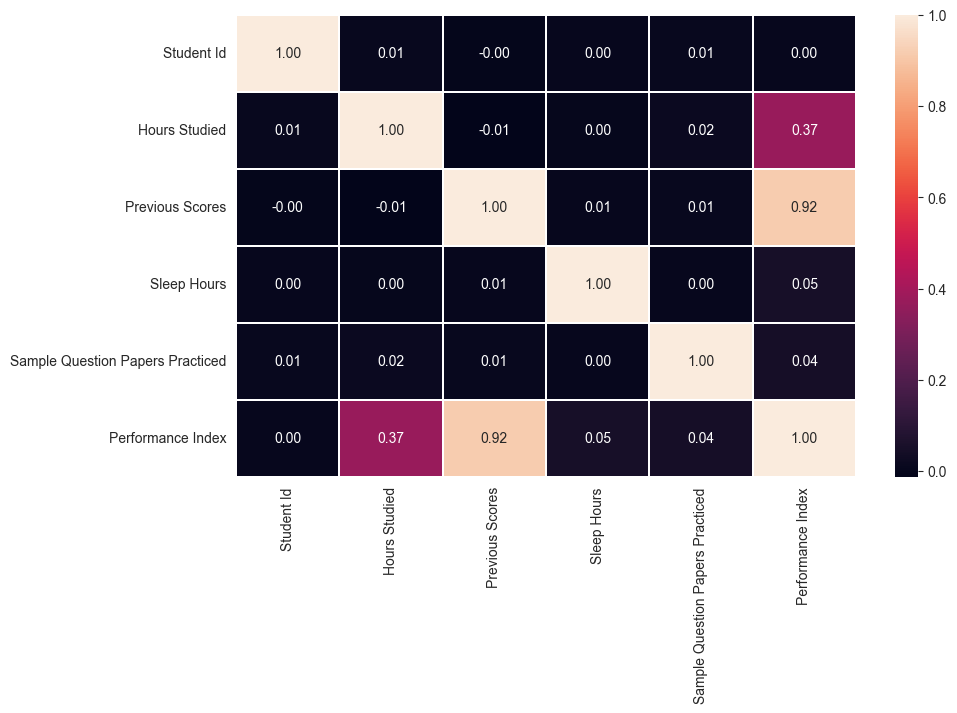

In [71]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

 - There's a lot of Strong Positive Relationships between Performance Index and Features

##  Data Preprocessing

In [72]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [73]:
# create object from labelencoder

encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [74]:
# see sample of data

data.sample(2)

,Student Id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6914,6915,5,82,1,4,7,67
9612,9613,5,54,1,5,9,37


In [75]:
# Splitting data into Indipendent and Dependent Variable

Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [76]:
# see sample of train data

Train.sample(3)


,Student Id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2827,2828,5,75,0,4,0
1520,1521,1,45,1,6,5
9086,9087,9,70,0,7,4


In [77]:
# see sample of target label

Target

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [79]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 6)
y_train shape:  (8000,)
x_test shape:  (2000, 6)
y_test shape:  (2000,)


## Modeling

In [80]:
# create object from RandomForestRegressor

model = LinearRegression()

In [81]:
# fit model

model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluating Results

In [82]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9886907811631598

In [83]:
# see predicted values

predict = np.round(model.predict(X_test), decimals = 1)

In [84]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51,54.7
4684,20,22.6
1731,46,47.9
4742,28,31.3
4521,41,43.0
...,...,...
6412,45,46.9
8285,66,62.7
7853,16,16.8
1095,65,63.3


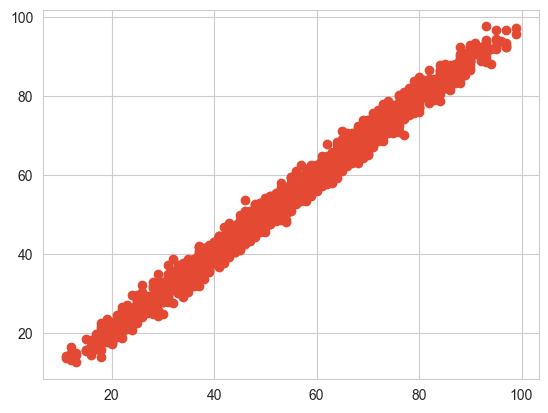

In [85]:
# Create scatter plot to see distribution

plt.scatter(y_test, predict)
plt.show()

In [86]:
# see mean absolute error 

mean_absolute_error(y_test,predict)

1.6106

In [87]:
# see score

r2_score(y_test,predict)

0.9889821263086022

In [88]:
# see coefficients values

model.coef_

array([6.31672731e-06, 2.85237333e+00, 1.01698634e+00, 6.08495880e-01,
       4.76888594e-01, 1.91822771e-01])

In [89]:
# see y intercept

model.intercept_

np.float64(-33.95248280957646)

**Equation of our multiple linear regression model is :**
   - 2.85 × Hours Studied + 1.02 × Previous Scores + 0.61 × Extracurricular Activities + 0.48 × Sleep Hours + 0.19 × Sample Question Papers Practiced - 33.92